# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

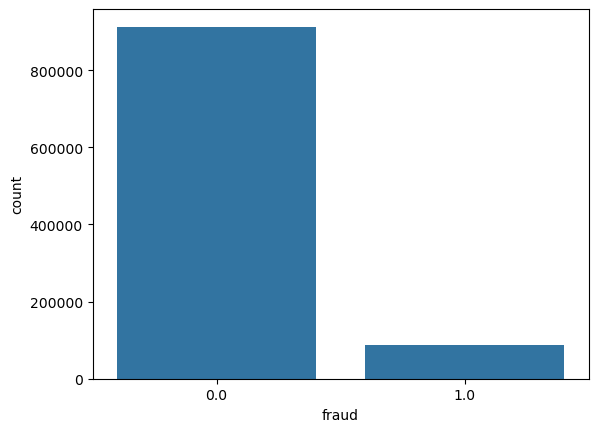

In [3]:
#genera countplot de fraud
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='fraud', data=fraud)
plt.show()

Accuracy: 0.945495

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97    182615
         1.0       0.92      0.41      0.57     17385

    accuracy                           0.95    200000
   macro avg       0.93      0.70      0.77    200000
weighted avg       0.94      0.95      0.94    200000

Feature coefficients: {'distance_from_home': 55.127709591476744, 'distance_from_last_transaction': 11.139914049767581, 'ratio_to_median_purchase_price': 148.50207950026737, 'repeat_retailer': -0.19983802449177152, 'used_chip': -0.7390980996450336, 'used_pin_number': -7.607836476308868, 'online_order': 4.1116498429372355}


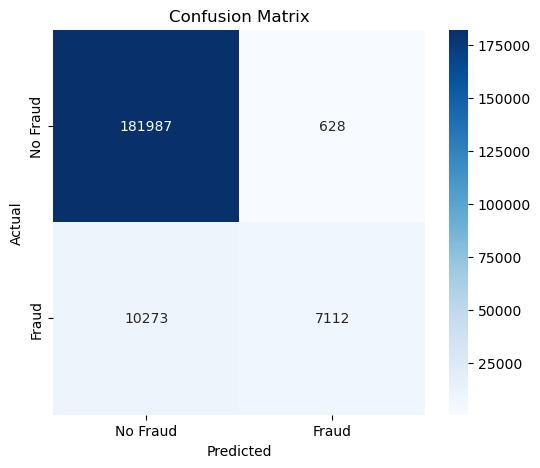

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Select features and target
features = fraud.drop(columns=["fraud"])
target_binary = fraud["fraud"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_binary, test_size=0.20, random_state=0)

# Normalize the features
normalizer = MinMaxScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

# Create and train the logistic regression model
log_reg = LogisticRegression(random_state=0, max_iter=1000)
log_reg.fit(X_train_norm, y_train)

# Make predictions
pred = log_reg.predict(X_test_norm)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))

# Optionally, you can examine the coefficients to see feature importance
log_reg_coef = {feature: coef for feature, coef in zip(X_train.columns, log_reg.coef_[0])}
print("Feature coefficients:", log_reg_coef)

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Se observa que el modelo predice excelentemente bien los casos de no fraude, pero no sirve para predecir los fraudes. Por lo tanto se aumentarán los datos de con fraudes positivos, para buscar entrenar mejor al modelo

In [5]:
train = pd.DataFrame(X_train_norm, columns = X_train.columns) # crea un dataframe con las columnas de x_train
train.sample(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
418513,0.001370,0.000008,0.002602,1.0,1.0,0.0,0.0
676988,0.001233,0.000002,0.001583,1.0,0.0,0.0,1.0
241088,0.000366,0.000059,0.002091,1.0,0.0,0.0,1.0
536621,0.000886,0.000071,0.004961,1.0,1.0,0.0,1.0
293117,0.000624,0.000121,0.002394,1.0,0.0,1.0,0.0


In [6]:
#al dataframe train se le agrega una columna con la variable a predecir
train['fraud']=y_train #esto para poder agrupar posteriormente

t_fraud = train[train["fraud"] == 1] #guarda en t_fraud los datos con fraude
f_fraud = train[train["fraud"] == 0]

t_fraud.sample(4)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
73894,0.000705,0.000426,0.003049,1.0,0.0,0.0,1.0,1.0
780771,0.000272,0.000064,0.002586,1.0,0.0,1.0,1.0,1.0
798785,0.012436,0.000021,0.001637,1.0,1.0,0.0,1.0,1.0
522906,0.000176,0.000054,0.003403,0.0,0.0,0.0,1.0,1.0


In [7]:
from sklearn.utils import resample 
#resamplea la clase minoritaria para igualar la cantidad de datos a  la clase mayoritaria
t_fraud_oversampled = resample(t_fraud, #datos a resamplear
                                    replace=True, #muestreo con reemplazo
                                    n_samples = len(f_fraud), #numero de muestras igual al de la clase mayor
                                    random_state=0) #semilla7

#concatena los datos de la clase mayortitaria con los datos resampleados
train_oversampled=pd.concat([f_fraud,t_fraud_oversampled])
train_oversampled.sample(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
153313,0.001596,0.000050,0.002702,1.0,0.0,0.0,1.0,1.0
550122,0.000605,0.000866,0.009048,1.0,0.0,0.0,0.0,0.0
96361,0.027441,0.000050,0.003265,1.0,0.0,0.0,1.0,0.0
22551,0.000103,0.000018,0.002182,0.0,1.0,0.0,1.0,0.0
259948,0.000757,0.000018,0.003431,1.0,0.0,0.0,1.0,1.0


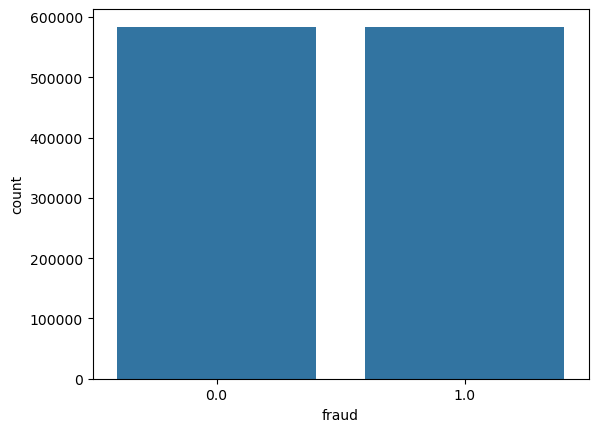

In [8]:
#genera countplot de fraud
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='fraud', data=train_oversampled)
plt.show()

In [9]:
# Nuevamente, se separan las caracteristicas y el target 
X_train_over = train_oversampled.drop(columns = ["fraud"])
y_train_over = train_oversampled["fraud"]

In [12]:
#Reentreno del modelo
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

c:\Users\Gerardo\anaconda33\envs\p2_en\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Accuracy: 0.374515

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.34      0.50    182615
         1.0       0.09      0.69      0.16     17385

    accuracy                           0.37    200000
   macro avg       0.51      0.52      0.33    200000
weighted avg       0.85      0.37      0.47    200000

Feature coefficients: {'distance_from_home': 0.0006666268355341877, 'distance_from_last_transaction': 0.00023574950171671225, 'ratio_to_median_purchase_price': 0.00045032868571737085, 'repeat_retailer': 0.0047899014167500685, 'used_chip': -0.008674257140623691, 'used_pin_number': -0.002634391617432003, 'online_order': -0.009157721569807695}


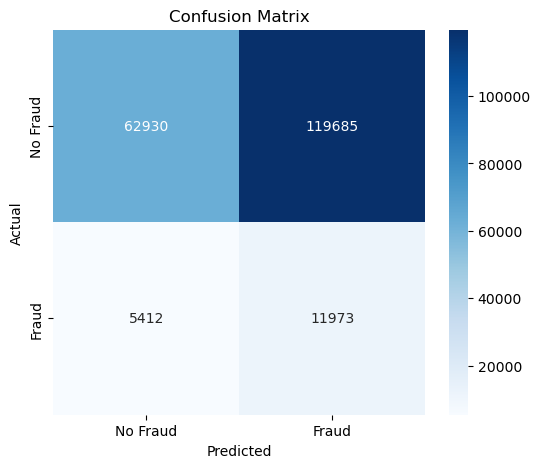

In [13]:
# Make predictions
pred = log_reg.predict(X_test_norm)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))

# Optionally, you can examine the coefficients to see feature importance
log_reg_coef = {feature: coef for feature, coef in zip(X_train.columns, log_reg.coef_[0])}
print("Feature coefficients:", log_reg_coef)

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Se observa una baja general de las predicciones del modelo

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64
fraud
0.0    87403
1.0    87403
Name: count, dtype: int64


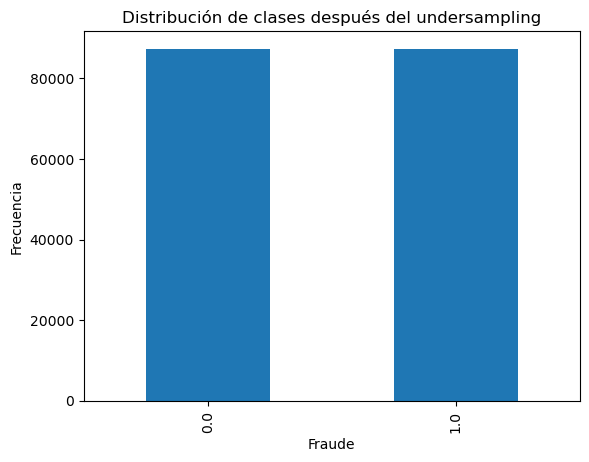

In [16]:
#Ahora se aplicará la técnica de submuestro undersampling:

#Undersampling

import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

print(fraud['fraud'].value_counts())

# Aplicar undersampling
X = fraud.drop(columns=['fraud'])
y = fraud['fraud']

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

print(y_resampled.value_counts())

y_resampled.value_counts().plot(kind='bar')
plt.title('Distribución de clases después del undersampling')
plt.xlabel('Fraude')
plt.ylabel('Frecuencia')
plt.show()

In [18]:
X_resampled.sample(4)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
186466,1.510507,6.141904,10.582930,0.0,0.0,0.0,1.0
622748,1.992312,3.267132,7.943664,1.0,0.0,0.0,1.0
767983,1.026606,0.172875,17.801359,0.0,0.0,0.0,0.0
710422,10.663052,0.148310,4.423413,1.0,1.0,0.0,0.0


c:\Users\Gerardo\anaconda33\envs\p2_en\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Gerardo\anaconda33\envs\p2_en\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.913075


c:\Users\Gerardo\anaconda33\envs\p2_en\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Gerardo\anaconda33\envs\p2_en\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      1.00      0.95    182615
         1.0       0.00      0.00      0.00     17385

    accuracy                           0.91    200000
   macro avg       0.46      0.50      0.48    200000
weighted avg       0.83      0.91      0.87    200000

Feature coefficients: {'distance_from_home': 0.02855815185126952, 'distance_from_last_transaction': 0.049461995697509885, 'ratio_to_median_purchase_price': 1.189056146670266, 'repeat_retailer': -1.4417142022970337, 'used_chip': -1.167642554424166, 'used_pin_number': -9.817881041298298, 'online_order': 5.033395334044968}


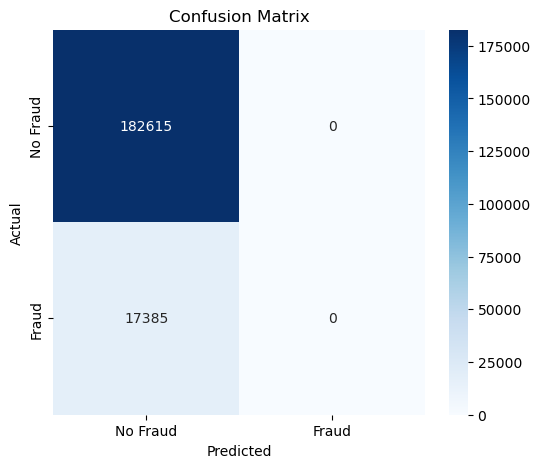

In [19]:
#crea nuevaente el modelo para entrenar

log_reg = LogisticRegression(random_state=0, max_iter=1000)
log_reg.fit(X_resampled, y_resampled) #entrena con datos undersampleados

# Make predictions
pred = log_reg.predict(X_test_norm)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))

# Optionally, you can examine the coefficients to see feature importance
log_reg_coef = {feature: coef for feature, coef in zip(X_train.columns, log_reg.coef_[0])}
print("Feature coefficients:", log_reg_coef)

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Finalmente se aplica un SMOTE para evaluar resultados 

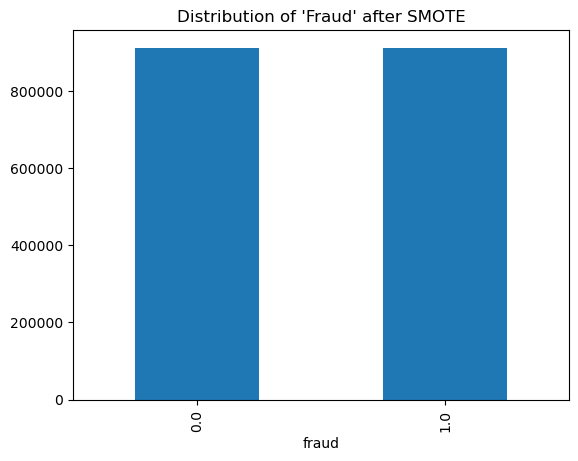

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


# Separate features and target variable
X = fraud.drop(columns=["fraud"])
y = fraud["fraud"]

# Apply SMOTE
smote = SMOTE(random_state=42)

X_resampled_sm, y_resampled_sm = smote.fit_resample(X, y)

# Check the new distribution of the target variable
y_resampled_sm.value_counts().plot(kind="bar")
plt.title("Distribution of 'Fraud' after SMOTE")
plt.show()

# Save the balanced data
fraud_resampled_sm = pd.concat([X_resampled_sm, y_resampled_sm], axis=1)

c:\Users\Gerardo\anaconda33\envs\p2_en\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Gerardo\anaconda33\envs\p2_en\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.913075


c:\Users\Gerardo\anaconda33\envs\p2_en\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Gerardo\anaconda33\envs\p2_en\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      1.00      0.95    182615
         1.0       0.00      0.00      0.00     17385

    accuracy                           0.91    200000
   macro avg       0.46      0.50      0.48    200000
weighted avg       0.83      0.91      0.87    200000

Feature coefficients: {'distance_from_home': 0.029269133066868888, 'distance_from_last_transaction': 0.049697577787294236, 'ratio_to_median_purchase_price': 1.2293023048823506, 'repeat_retailer': -1.4673242812582963, 'used_chip': -1.2412519761907486, 'used_pin_number': -12.432532555975891, 'online_order': 5.221573296493307}


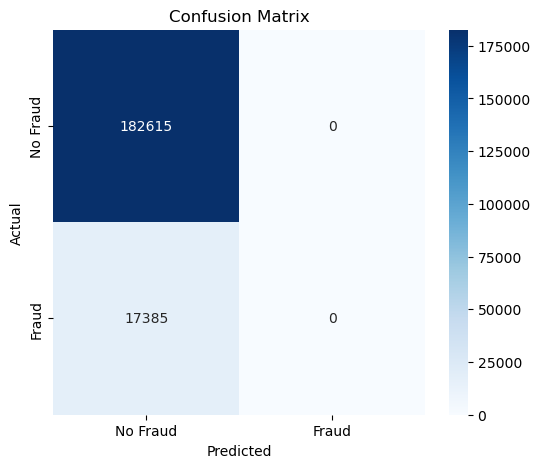

In [25]:
#crea nuevaente el modelo para entrenar

log_reg = LogisticRegression(random_state=0, max_iter=1000)
log_reg.fit(X_resampled_sm, y_resampled_sm) #entrena con datos undersampleados

# Make predictions
pred = log_reg.predict(X_test_norm)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))

# Optionally, you can examine the coefficients to see feature importance
log_reg_coef = {feature: coef for feature, coef in zip(X_train.columns, log_reg.coef_[0])}
print("Feature coefficients:", log_reg_coef)

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()